In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [287]:
im = cv2.imread(r'spiderman.jpg',cv2.IMREAD_GRAYSCALE)

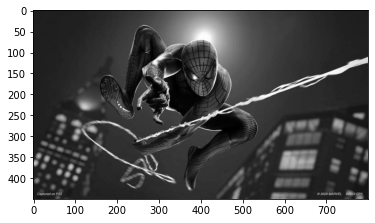

In [288]:
plt.imshow(im, cmap='gray')

In [289]:
masksmoothing = np.ones((9,9))/81

In [290]:
imblurred = signal.convolve2d(im, masksmoothing, boundary='symm', mode='same')

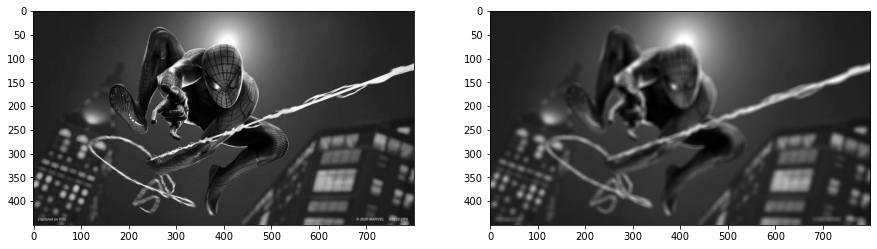

In [291]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(im, cmap='gray')
ax2.imshow(imblurred, cmap='gray')

In [292]:
xmask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
ymask = xmask.T.copy()

In [293]:
fx = signal.convolve2d(im, xmask, boundary='symm', mode='same')
fy = signal.convolve2d(im, ymask, boundary='symm', mode='same')

In [294]:
im.shape

(450, 800)

In [295]:
fy.shape

(450, 800)

In [296]:
grading_magnitude = (fx**2 + fy**2)**0.5

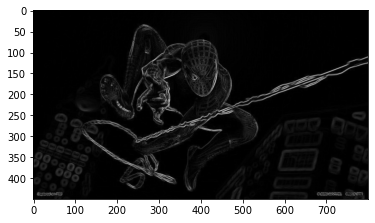

In [297]:
plt.imshow(grading_magnitude, cmap='gray')

In [298]:
th = grading_magnitude.max()-2*grading_magnitude.std()


In [299]:
e = grading_magnitude > 60

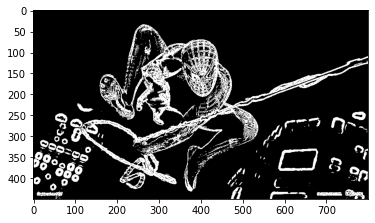

In [300]:
plt.imshow(e, cmap='gray')

In [303]:
imsharped = imblurred + grading_magnitude

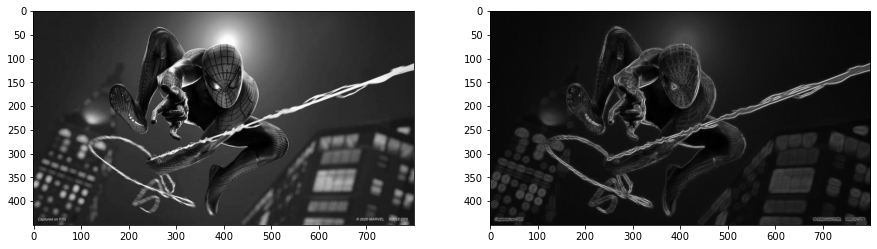

In [304]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(im, cmap='gray')
ax2.imshow(imsharped, cmap='gray')